# Projeto de ciência de dados

## Pedro Lucas Rocha Almeida Santos

# Definição do problema

O problema central deste projeto reside na necessidade de prever, de forma precisa e eficiente, o tempo de parada de caminhões durante o carregamento de vasilhames de GLP, como P13, P20 e P45.
Atualmente, a variação no tempo de permanência pode resultar em ineficiências logísticas, atrasos e dificuldades no planejamento operacional.
Utilizar um algoritmo de regressão linear para modelar essa relação busca resolver essa questão, permitindo uma melhor gestão do tempo e otimização dos recursos no processo de carga dos caminhões.

# 1. Instalando as bibliotecas

In [234]:
pip install pandas odfpy # instala as bibliotecas panda e odfpy


# 2. Importando as bibliotecas

In [235]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 3. Importando os dados do Github para o código
Importando os dados  e definindos os cabeçalhos


In [236]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/PedroLucasRAS/projetos_cd/refs/heads/main/Dados-Projeto.csv"

# Informa o cabeçalho das colunas
colunas = ['Cliente', 'Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20', 'Intervalo de horas']

# Lê o arquivo utilizando as colunas informadas
data = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')


In [237]:
data.head()

,Cliente,Qtd de vasilhames P 13,Qtd P 45,Qtd P 20,Intervalo de horas
0,Cliente 1,7,3,4,3.0
1,Cliente 2,4,2,6,3.0
2,Cliente 3,8,4,6,3.0
3,Cliente 4,5,3,8,3.0
4,Cliente 5,7,2,1,3.0


# 4. Análise de dados

### 4.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.
Os dados de intervalo de tempo estão numérico sendo o resultado de: ((Valor)/60)/24.
Estes é o formato de número do excel para minutos

In [238]:
# Mostra as dimensões do dataset
print(data.shape)

(500, 5)


In [239]:
# Mostra as informações do dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cliente                 500 non-null    object 
 1   Qtd de vasilhames P 13  500 non-null    int64  
 2   Qtd P 45                500 non-null    int64  
 3   Qtd  P 20               500 non-null    int64  
 4   Intervalo de horas      500 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 19.7+ KB
None


In [240]:
# Mostra as 10 primeiras linhas do dataset
data.head(10)

,Cliente,Qtd de vasilhames P 13,Qtd P 45,Qtd P 20,Intervalo de horas
0,Cliente 1,7,3,4,3.0
1,Cliente 2,4,2,6,3.0
2,Cliente 3,8,4,6,3.0
3,Cliente 4,5,3,8,3.0
4,Cliente 5,7,2,1,3.0
5,Cliente 6,3,1,7,3.0
6,Cliente 7,7,1,1,3.0
7,Cliente 8,8,2,7,3.0
8,Cliente 9,5,2,3,3.0
9,Cliente 10,4,4,8,3.0


# 5. Implementando e testando o algorítimo de regressão linear

In [241]:
# Selecionando as características e a variável alvo
X = data[['Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20']]
y = data['Intervalo de horas']

5.1 Preenchendo os valores faltantes, utilizado a média como dado

In [242]:
# Preencher valores faltantes (NaN) com a média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

5.2 Dividindo os dados em teste e treinamento

In [243]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5.3 Criando o modelo de regressão e treinando

In [244]:
# Crie e treine o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

5.4 Gráfico de resíduos e Avaliação do modelo

Mean Squared Error (MSE): 0.007012128025751382
Mean Absolute Error (MAE): 0.03602455854696671
R² Score: 0.9663149376945244


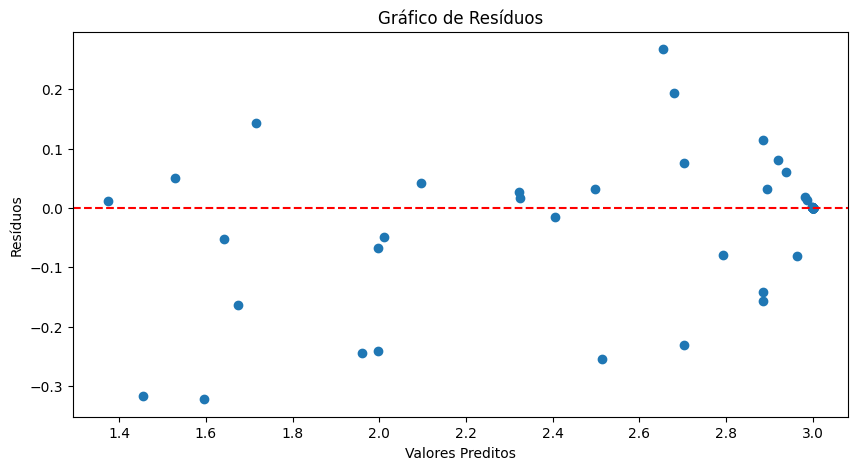

In [245]:
# Prevendo com os dados de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


# Gráfico de Resíduos
residuos = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

Análise
*   O MSE é uma medida que quantifica a média dos erros ao quadrado entre as previsões do modelo e os valores reais. Um MSE próximo de zero indica que o modelo tem um bom ajuste aos dados. Neste caso, o MSE é muito baixo, o que sugere que as previsões do modelo estão muito próximas dos valores reais.
*   O MAE mede a média dos erros absolutos entre as previsões do modelo e os valores reais. Assim como o MSE, um MAE menor indica um melhor desempenho do modelo. Um MAE de aproximadamente 0.036 sugere que, em média, as previsões do modelo estão a cerca de 0.036 horas (ou aproximadamente 2,16 minutos) do valor real. Este é um erro muito pequeno e aceitável para muitas aplicações.
*   O  R² (ou coeficiente de determinação) mede a proporção da variabilidade da variável dependente que pode ser explicada pelo modelo. O R² varia entre 0 e 1, onde 1 indica que o modelo explica 100% da variabilidade nos dados. Um R² de aproximadamente 0.966 sugere que cerca de 96,6% da variabilidade no intervalo de horas pode ser explicada pelas variáveis independentes (quantidades de vasilhames). Isso é considerado um excelente resultado e indica que o modelo está se ajustando bem aos dados.





# 6. Criando o pipeline

6.1 Determinando e rodando os algorítmos

In [246]:
# Função para converter numpy.ndarray de volta para DataFrame
def to_dataframe(X):
    return pd.DataFrame(X, columns=['Qtd de vasilhames P 13', 'Qtd P 45', 'Qtd P 20'])

In [247]:
# Definindo a pipeline com imputação e escalonamento
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputação de valores faltantes
    ('scaler', StandardScaler())  # Escalonamento dos dados
])

In [248]:
# Modelos e seus hiperparâmetros
modelos_params = {
    'Regressão Linear': {
        'modelo': LinearRegression(),
        'params': {}
    },
    'Random Forest': {
        'modelo': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'modelo': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'modelo': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Árvore de Decisão': {
        'modelo': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    }
}

6.2 Mostrando e comparando os resultados


In [249]:
# Carregando os dados
data = pd.read_csv(url)

# Separando variáveis independentes e dependentes
X = data[['Qtd de vasilhames P 13', 'Qtd P 45', 'Qtd P 20']]
y = data['Intervalo de horas']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Armazenar resultados
resultados = []

# Testando os modelos
for nome, config in modelos_params.items():
    # Criando a pipeline com o pré-processamento e o modelo
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('modelo', config['modelo'])
    ])

    # Ajustando o modelo
    pipeline.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = pipeline.predict(X_test)

    # Avaliando o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenando os resultados
    resultados.append({'Modelo': nome, 'MSE': mse, 'R²': r2})

# Criando um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Exibindo os resultados
print(df_resultados)


              Modelo       MSE        R²
0   Regressão Linear  0.103073  0.504855
1      Random Forest  0.007799  0.962536
2                SVM  0.008766  0.957891
3                KNN  0.018408  0.911569
4  Árvore de Decisão  0.010397  0.950053


6.3 Comparação dos gráficos ROC e Matrizes de confusão

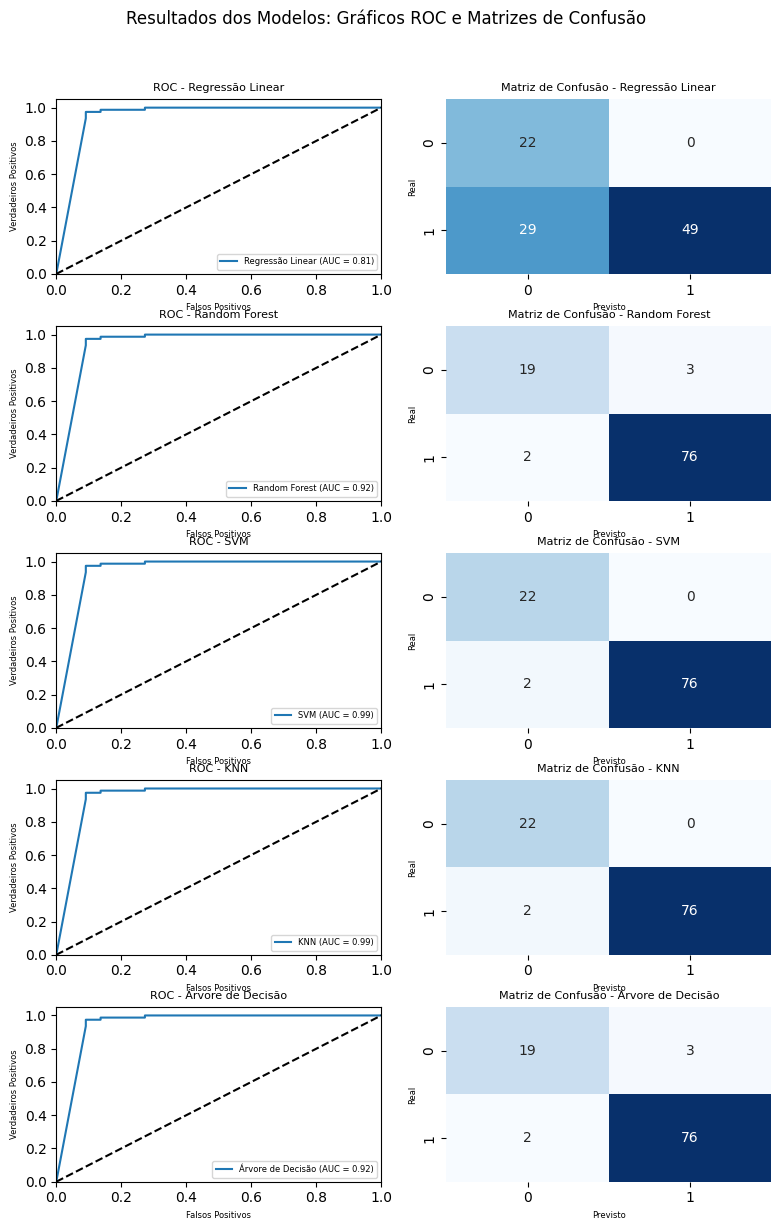

In [257]:
# Plotando os resultados
fig, axes = plt.subplots(nrows=len(modelos), ncols=2, figsize=(8, len(modelos) * 2.5))  # Tamanho ajustado
fig.suptitle('Resultados dos Modelos: Gráficos ROC e Matrizes de Confusão', fontsize=12)

for i, (nome, cm) in enumerate(zip(modelos.keys(), confusion_matrices)):
    # Gráfico ROC
    fpr, tpr, _ = roc_curve((y_test >= limiar).astype(int), y_pred)  # Usando valores contínuos para ROC
    axes[i, 0].plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc_scores[i]:.2f})')
    axes[i, 0].plot([0, 1], [0, 1], 'k--')
    axes[i, 0].set_xlim([0.0, 1.0])
    axes[i, 0].set_ylim([0.0, 1.05])
    axes[i, 0].set_title(f'ROC - {nome}', fontsize=8)  # Título menor
    axes[i, 0].set_xlabel('Falsos Positivos', fontsize=6)  # Etiqueta menor
    axes[i, 0].set_ylabel('Verdadeiros Positivos', fontsize=6)  # Etiqueta menor
    axes[i, 0].legend(loc='lower right', fontsize=6)  # Legenda menor

    # Matriz de Confusão
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i, 1], cmap='Blues', cbar=False)
    axes[i, 1].set_title(f'Matriz de Confusão - {nome}', fontsize=8)  # Título menor
    axes[i, 1].set_xlabel('Previsto', fontsize=6)  # Etiqueta menor
    axes[i, 1].set_ylabel('Real', fontsize=6)  # Etiqueta menor

# Ajustando layout para caber em uma página
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Ajuste do espaçamento
plt.show()


Análise

*   Desta forma, vemos que o melhor modelo é o  de Random forest, pois possui um MSE mais baixo que os outros, como também um R² mais próximo do 1 que os outros modelos





# 7. Ler os dados da planilha de agendamento do dia

In [258]:
# Agora, vamos ler os dados de outra planilha para fazer as previsões
novos_dados = pd.read_excel('Agendamento.xlsx')

# Preencher valores vazios com zero
novos_dados[['Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20']] = novos_dados[['Qtd de vasilhames P 13', 'Qtd P 45','Qtd  P 20']].fillna(0)

7.1 Fazendo a previsão

In [260]:
# Faça a previsão para cada linha e crie uma nova coluna com os resultados
novos_dados['TEMPO PERMANÊNCIA PREVISTO (horas)'] = [
    math.ceil(model.predict([[row['Qtd de vasilhames P 13'], row['Qtd  P 20'], row[ 'Qtd P 45']]])[0])
    for _, row in novos_dados.iterrows()
]

7.2 Salvando os dados na nova planilha

In [261]:
# Salve os resultados em uma nova planilha
novos_dados.to_excel('Agendamento com Previsão.xlsx', index=False)

print("Previsões concluídas e salvas em 'Agendamento com Previsão.xlsx'")

Previsões concluídas e salvas em 'Agendamento com Previsão.xlsx'
